# Statistical NLP_Multilabel classification using Blog Authorship Corpus data

## Project Description:

Classification is probably the most popular task that you would deal with in real life.
Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her.

We are going to create a classifier that predicts multiple features of the author of a given text.
We have designed it as a Multilabel classification problem.

## Dataset:

Blog Authorship Corpus:
Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person.

Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labeled for gender and age but for many, industry and/or sign is marked as unknown.) 

All bloggers included in the corpus fall into one of three age groups: 

    * 8240 "10s" blogs (ages 13-17)
    * 8086 "20s" blogs(ages 23-27)
    * 2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers. 

Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label urllink.

Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus/downloads

#### Data Description:

This dataset contains text from blogs written on or before 2004, with each blog being the work of a single user.

Columns
* id
* gender
* age
* topic
* sign
* date
* text

### 1) Load the dataset (5 points)
##### a. Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.

In [1]:
import os 
print(os.getcwd())

C:\Users\Venkatesh K Govindan\PGP-AIML\Project\Residency-8\Statistical NLP Project


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth' , 100)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', palette='spring', rc={'figure.figsize':(8,6)})

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [3]:
blog_df=pd.read_csv('blogtext.csv').dropna()

In [4]:
blog_df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [5]:
blog_df.sample(5,random_state=99)

,id,gender,age,topic,sign,date,text
233392,105748,female,26,Student,Scorpio,"04,July,2004",Thanks Ching for making me feel better... the past two days were like hell. You know wh...
67543,2134154,male,16,Arts,Taurus,"01,June,2004","Okay, I've had it. For 45 minutes I was fired from this blog by Marten because he is bein..."
83237,2230451,male,33,indUnk,Capricorn,"11,May,2004",Can anyone explain this... im confused!! urlLink Journal SLEEP
10529,3702123,male,26,Architecture,Cancer,"21,June,2004",I guess to the governator everybody's a girlie man compare to him Some California le...
104785,3408861,male,15,indUnk,Aries,"30,May,2004",Another day is going by I'm thinking about you all the time But you're out there And I'm ...


In [6]:
blog_df.shape

(681284, 7)

###### Observation: Huge volumn of blog data (around 6.8 lakhs blogs); for processing this huge volumn data (has to be converted into tokens, will increase volumn furthur more) more time and high capacity machine is needed. So I'll be taking a small sample from this dataset.

In [7]:
print(blog_df.topic.unique())
print(len(blog_df.topic.unique()))

['Student' 'InvestmentBanking' 'indUnk' 'Non-Profit' 'Banking' 'Education'
 'Engineering' 'Science' 'Communications-Media' 'BusinessServices'
 'Sports-Recreation' 'Arts' 'Internet' 'Museums-Libraries' 'Accounting'
 'Technology' 'Law' 'Consulting' 'Automotive' 'Religion' 'Fashion'
 'Publishing' 'Marketing' 'LawEnforcement-Security' 'HumanResources'
 'Telecommunications' 'Military' 'Government' 'Transportation'
 'Architecture' 'Advertising' 'Agriculture' 'Biotech' 'RealEstate'
 'Manufacturing' 'Construction' 'Chemicals' 'Maritime' 'Tourism'
 'Environment']
40


###### Observation: Blog is spread for 40 unique topics.

In [8]:
blog_df.topic.value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

###### Observation: Above show # of blogs for each unique topics; around 60% of blog data are for topics 'indUnk' and 'Student' . Blog date is less than 1% for above 75% of topics. Also blog distribution is not even across topics.

###### **** Dataset is large and it is not balanced across topic, so downsampling the data to balance across some random topics

In [9]:
 from sklearn.utils import resample

In [10]:
blog_student=resample(blog_df[(blog_df.topic=='Student')],replace=True,n_samples=2500,random_state=99)
blog_tech=resample(blog_df[(blog_df.topic=='Technology')],replace=True,n_samples=2500,random_state=99)
blog_arts=resample(blog_df[(blog_df.topic=='Arts')],replace=True,n_samples=2500,random_state=99) 
blog_nonprofit=resample(blog_df[(blog_df.topic=='Non-Profit')],replace=True,n_samples=2500,random_state=99)
blog_engg=resample(blog_df[(blog_df.topic=='Engineering')],replace=True,n_samples=2500,random_state=99)
blog_law=resample(blog_df[(blog_df.topic=='Law')],replace=True,n_samples=2500,random_state=99)
blog_science=resample(blog_df[(blog_df.topic=='Science')],replace=True,n_samples=2500,random_state=99)
blog_gov=resample(blog_df[(blog_df.topic=='Government')],replace=True,n_samples=2500,random_state=99)
blog_reli=resample(blog_df[(blog_df.topic=='Religion')],replace=True,n_samples=2500,random_state=99) 
blog_fash=resample(blog_df[(blog_df.topic=='Fashion')],replace=True,n_samples=2500,random_state=99) 
blog_bank=resample(blog_df[(blog_df.topic=='Banking')],replace=True,n_samples=2500,random_state=99) 
blog_military=resample(blog_df[(blog_df.topic=='Military')],replace=True,n_samples=2500,random_state=99)
blog_sport=resample(blog_df[(blog_df.topic=='Sports-Recreation')],replace=True,n_samples=2500,random_state=99) 
blog_advertising=resample(blog_df[(blog_df.topic=='Advertising')],replace=True,n_samples=2500,random_state=99) 
blog_realestate=resample(blog_df[(blog_df.topic=='RealEstate')],replace=True,n_samples=2500,random_state=99) 

In [11]:
blog_df1=pd.concat([blog_student, blog_tech, blog_arts, blog_nonprofit, blog_engg, blog_law, blog_science, blog_gov, blog_reli, blog_fash, blog_bank, blog_military, blog_sport, blog_advertising, blog_realestate])

In [12]:
blog_df1.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [13]:
blog_df1.sample(5,random_state=99)

,id,gender,age,topic,sign,date,text
249825,307112,female,24,Arts,Virgo,"02,July,2004","Thanks to ALL who came out for my bday. I was nice n drunk:) Quiting smoking SUCKS, w..."
75179,3801738,male,37,Military,Gemini,"30,June,2004","I have found, in the few years I have been on this rock, that the biggest problem with a..."
388294,3487175,male,23,Engineering,Virgo,"27,July,2004","do u know catwoman ? if u dont ,U better know about it history. according to the re..."
148257,2290567,male,27,Non-Profit,Virgo,"20,July,2004",And the drinking. The drinking. All the wonderful drinking. &nbsp; Because what else ca...
548446,64145,male,36,Military,Taurus,"08,October,2002",The end is nearing. Hours counting down to travel. The first half is done.


In [14]:
blog_df1.shape

(37500, 7)

In [15]:
blog_df1.topic.value_counts()

Government           2500
Student              2500
Banking              2500
Non-Profit           2500
Law                  2500
Advertising          2500
Engineering          2500
Technology           2500
Religion             2500
Arts                 2500
Military             2500
RealEstate           2500
Sports-Recreation    2500
Science              2500
Fashion              2500
Name: topic, dtype: int64

###### Observation: Blog data is downsampled around 5% of original data with even distribution of random topics.

### 2) Preprocess rows of the “text” column (7.5 points)
###### Included few more preprocessing steps for blog text (including the listed in project description) 

In [16]:
import re
import string
from bs4 import BeautifulSoup
import spacy
import unidecode
from pycontractions import Contractions
import gensim.downloader as api

In [17]:
# load spacy model, can be "en_core_web_sm" as well
nlp = spacy.load('en')
# Choose model accordingly for contractions function
model = api.load("glove-twitter-25")
cont = Contractions(kv_model=model)
cont.load_models()

#### a. Remove unwanted characters from blog text

###### 1) Remove HTML tags from text

In [18]:
blog_df1['text'].sample(5,random_state=99)

249825               Thanks to ALL who came out for my bday. I was nice n drunk:) Quiting smoking SUCKS, w...
75179            I have found, in the few years I have been on this rock,  that the biggest problem with a...
388294               do u know catwoman ?  if u dont ,U better know about it history.  according to the re...
148257           And the drinking. The drinking. All the wonderful drinking.  &nbsp;  Because what else ca...
548446                    The end is nearing. Hours counting down to travel. The first half is done.         
Name: text, dtype: object

In [19]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [20]:
format_text=[]
for text in blog_df1['text']:
    format_text.append(strip_html_tags(text))
blog_df1['format_text']=format_text  

In [21]:
blog_df1['format_text'].sample(5,random_state=99)

249825               Thanks to ALL who came out for my bday. I was nice n drunk:) Quiting smoking SUCKS, w...
75179            I have found, in the few years I have been on this rock,  that the biggest problem with a...
388294               do u know catwoman ?  if u dont ,U better know about it history.  according to the re...
148257           And the drinking. The drinking. All the wonderful drinking.     Because what else can I d...
548446                    The end is nearing. Hours counting down to travel. The first half is done.         
Name: format_text, dtype: object

###### 2) Remove Accented characters from text

In [22]:
def remove_accented_chars(text):
    return unidecode.unidecode(text)

In [23]:
format_text=[]
for text in blog_df1['format_text']:
    format_text.append(remove_accented_chars(text))
blog_df1['format_text']=format_text 

In [24]:
blog_df1['format_text'].sample(5,random_state=99)

249825               Thanks to ALL who came out for my bday. I was nice n drunk:) Quiting smoking SUCKS, w...
75179            I have found, in the few years I have been on this rock,  that the biggest problem with a...
388294               do u know catwoman ?  if u dont ,U better know about it history.  according to the re...
148257           And the drinking. The drinking. All the wonderful drinking.     Because what else can I d...
548446                    The end is nearing. Hours counting down to travel. The first half is done.         
Name: format_text, dtype: object

###### 3) Expand contracted words in text

In [25]:
#def expand_contractions(text):
#    return list(cont.expand_texts([text]))[0]

In [26]:
#format_text=[]
#for text in blog_df1['format_text']:
#    format_text.append(expand_contractions(text))
#blog_df1['format_text']=format_text 

###### Execution of above takes a lot of time, so expanding only specific contracted words 

In [27]:
def decontracted(text):
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"wont", "will not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"bday", "birthday", text)
    return text

In [28]:
format_text=[]
for text in blog_df1['format_text']:
    format_text.append(decontracted(text))
blog_df1['format_text']=format_text 

In [29]:
blog_df1['format_text'].sample(5,random_state=99)

249825               Thanks to ALL who came out for my birthday. I was nice n drunk:) Quiting smoking SUCK...
75179            I have found, in the few years I have been on this rock,  that the biggest problem with a...
388294               do u know catwoman ?  if u do not ,U better know about it history.  according to the ...
148257           And the drinking. The drinking. All the wonderful drinking.     Because what else can I d...
548446                    The end is nearing. Hours counting down to travel. The first half is done.         
Name: format_text, dtype: object

###### 4) Removing punctuation characters from text, to reduces # of unique words

In [30]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
blog_df1['format_text'].sample(5,random_state=99)

249825               Thanks to ALL who came out for my birthday. I was nice n drunk:) Quiting smoking SUCK...
75179            I have found, in the few years I have been on this rock,  that the biggest problem with a...
388294               do u know catwoman ?  if u do not ,U better know about it history.  according to the ...
148257           And the drinking. The drinking. All the wonderful drinking.     Because what else can I d...
548446                    The end is nearing. Hours counting down to travel. The first half is done.         
Name: format_text, dtype: object

In [32]:
blog_df1['format_text']=blog_df1.format_text.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))

In [33]:
blog_df1['format_text'].sample(5,random_state=99)

249825               Thanks to ALL who came out for my birthday I was nice n drunk Quiting smoking SUCKS w...
75179            I have found in the few years I have been on this rock  that the biggest problem with all...
388294               do u know catwoman   if u do not U better know about it history  according to the rep...
148257           And the drinking The drinking All the wonderful drinking     Because what else can I do B...
548446                       The end is nearing Hours counting down to travel The first half is done         
Name: format_text, dtype: object

###### 5) Convert number words to digits, for cleaning numering data which along makes no sense 

In [34]:
blog_df1['format_text'].sample(5,random_state=123)

178500                Major Redesign   As you can see I have revamped my blog  I have also included links ...
574050                 One of my friend is parents own a little chinese restaurant in Atlanta  The food is...
209991            3 years na kame tomorrow  hehe ang sayasaya 3 yrs epro parang bago pa rin i love you so ...
582593                  urlLink Jason is  saying he has font size and setting problems but I think it look...
572972           It happens to us all occasionally  I have used and configured ApacheTomcat IIS and Resin ...
Name: format_text, dtype: object

In [35]:
from word2number import w2n

def convert_w2n(text):
    doc = nlp(text)
    try:
        tokens = ([w2n.word_to_num(token.text) if token.pos_ == 'NUM' else token for token in doc])
        return ' '.join(str(e) for e in tokens)
    except ValueError as ve:
        return text

In [36]:
format_text=[]
for text in blog_df1['format_text']:
    format_text.append(convert_w2n(text))
blog_df1['format_text']=format_text

In [37]:
blog_df1['format_text'].sample(5,random_state=123)

178500                 Major Redesign    As you can see I have revamped my blog   I have also included lin...
574050                  1 of my friend is parents own a little chinese restaurant in Atlanta   The food is...
209991             3 years na kame tomorrow   hehe ang sayasaya 3 yrs epro parang bago pa rin i love you s...
582593                   urlLink Jason is   saying he has font size and setting problems but I think it lo...
572972            It happens to us all occasionally   I have used and configured ApacheTomcat IIS and Resi...
Name: format_text, dtype: object

###### 6) Removing digits from text 

In [38]:
blog_df1['format_text'].head()

110215                                                 urlLink     12222003   What I do   urlLink            
272700            What a cool idea Hispanic Women Black and Men all have their own channels why not the ga...
412020               the mac store is not populated by employees who love the mac and are eager to tell yo...
110378            nyaoo   i passed my 24 km todae   yayy for mie    ganbatte ne   hehe   but i run 24 i wa...
306748            Scorpio   October 23   November 20 Make your dreams a valuable tool for insight dear Sco...
Name: format_text, dtype: object

In [39]:
blog_df1['format_text'] = blog_df1['format_text'].str.replace( '[\d]' , '' )

In [40]:
blog_df1['format_text'].head()

110215                                                         urlLink        What I do   urlLink            
272700            What a cool idea Hispanic Women Black and Men all have their own channels why not the ga...
412020               the mac store is not populated by employees who love the mac and are eager to tell yo...
110378            nyaoo   i passed my  km todae   yayy for mie    ganbatte ne   hehe   but i run  i was mo...
306748            Scorpio   October    November  Make your dreams a valuable tool for insight dear Scorpio...
Name: format_text, dtype: object

#### b. Convert text to lowercase, to reduce number of unique words because of case difference

In [41]:
blog_df1['format_text'].sample(5,random_state=99)

249825                Thanks to ALL who came out for my birthday I was nice n drunk Quiting smoking SUCKS ...
75179             I have found in the few years I have been on this rock   that the biggest problem with a...
388294                do u know catwoman    if u do not U better know about it history   according to the ...
148257            And the drinking The drinking All the wonderful drinking      Because what else can I do...
548446                       The end is nearing Hours counting down to travel The first half is done         
Name: format_text, dtype: object

In [42]:
blog_df1.format_text=blog_df1.format_text.apply(lambda x : ' '.join( word.lower() for word in x.split()))

In [43]:
blog_df1['format_text'].sample(5,random_state=99)

249825    thanks to all who came out for my birthday i was nice n drunk quiting smoking sucks well i have ...
75179     i have found in the few years i have been on this rock that the biggest problem with all people ...
388294    do u know catwoman if u do not u better know about it history according to the report of urllink...
148257    and the drinking the drinking all the wonderful drinking because what else can i do because i ha...
548446                                the end is nearing hours counting down to travel the first half is done
Name: format_text, dtype: object

#### c. Remove unwanted spaces

In [44]:
blog_df1['format_text'].head()

110215                                                                              urllink what i do urllink
272700    what a cool idea hispanic women black and men all have their own channels why not the gay commun...
412020    the mac store is not populated by employees who love the mac and are eager to tell you all about...
110378    nyaoo i passed my km todae yayy for mie ganbatte ne hehe but i run i was moodswing lor feel abit...
306748    scorpio october november make your dreams a valuable tool for insight dear scorpio in days past ...
Name: format_text, dtype: object

In [45]:
blog_df1.format_text=blog_df1.format_text.apply(lambda x: ' '.join(x.split()))

In [46]:
blog_df1['format_text'].head()

110215                                                                              urllink what i do urllink
272700    what a cool idea hispanic women black and men all have their own channels why not the gay commun...
412020    the mac store is not populated by employees who love the mac and are eager to tell you all about...
110378    nyaoo i passed my km todae yayy for mie ganbatte ne hehe but i run i was moodswing lor feel abit...
306748    scorpio october november make your dreams a valuable tool for insight dear scorpio in days past ...
Name: format_text, dtype: object

#### d. Remove stopwords, most commenly used words which doesn't add meaning to text

In [47]:
blog_df1['format_text'].sample(5,random_state=99)

249825    thanks to all who came out for my birthday i was nice n drunk quiting smoking sucks well i have ...
75179     i have found in the few years i have been on this rock that the biggest problem with all people ...
388294    do u know catwoman if u do not u better know about it history according to the report of urllink...
148257    and the drinking the drinking all the wonderful drinking because what else can i do because i ha...
548446                                the end is nearing hours counting down to travel the first half is done
Name: format_text, dtype: object

In [48]:
# exclude words from spacy stopwords list to preserve the meaning of the text
from nltk.corpus import stopwords
deselect_stop_words=['no', 'not']
for i in deselect_stop_words:
    nlp.vocab[i].is_stop=False

In [49]:
stop=stopwords.words('english')
blog_df1.format_text=blog_df1.format_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop))

In [50]:
blog_df1['format_text'].sample(5,random_state=99)

249825    thanks came birthday nice n drunk quiting smoking sucks well nt yet cut intake important meeting...
75179     found years rock biggest problem people planet emotion emotion things love give truth fact every...
388294    u know catwoman u u better know history according report urllink gamespy poor woman dead break w...
148257    drinking drinking wonderful drinking else go church last night drinking morgan beginning afterno...
548446                                                      end nearing hours counting travel first half done
Name: format_text, dtype: object

#### e. Apply Lemmatization to text; documents are going to use different forms of a word, so Stemming and lemmatization will reduce the number of unique words. Lemmatizing extract the ‘lemma’ from a given word after its morphological analysis (time consuming compared to Stemming). 

In [51]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to C:\Users\Venkatesh K
[nltk_data]     Govindan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
blog_df1['format_text'].sample(5,random_state=99)

249825    thanks came birthday nice n drunk quiting smoking sucks well nt yet cut intake important meeting...
75179     found years rock biggest problem people planet emotion emotion things love give truth fact every...
388294    u know catwoman u u better know history according report urllink gamespy poor woman dead break w...
148257    drinking drinking wonderful drinking else go church last night drinking morgan beginning afterno...
548446                                                      end nearing hours counting travel first half done
Name: format_text, dtype: object

In [53]:
def get_lemma_text(text):
    doc = nlp(text)
    tokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in doc]
    return ' '.join(str(e) for e in tokens)

In [54]:
format_text=[]
for text in blog_df1['format_text']:
    format_text.append(get_lemma_text(text))
blog_df1['format_text']=format_text

In [55]:
blog_df1['format_text'].sample(5,random_state=99)

249825    thank come birthday nice n drunk quiting smoking suck well nt yet cut intake important meeting r...
75179     find year rock big problem people planet emotion emotion thing love give truth fact everyone suf...
388294    u know catwoman u u better know history accord report urllink gamespy poor woman dead break wind...
148257    drink drink wonderful drinking else go church last night drink morgan begin afternoon wake after...
548446                                                               end near hour count travel first half do
Name: format_text, dtype: object

#### f. Remove most frequently used words from text, which appears almost in all text and provides little or no value for processing 

In [56]:
all_words=' '.join(blog_df1['format_text']).split()
freqeuncy=pd.Series(all_words).value_counts()[:20]
print(freqeuncy)

go         44674
get        44069
like       32639
would      25872
know       25018
think      24301
time       23563
say        23034
make       20980
see        20344
urllink    19911
good       19491
day        17999
well       17817
really     17313
people     16882
thing      16807
want       16626
come       15813
take       15508
dtype: int64


In [57]:
blog_df1['format_text']=blog_df1['format_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in freqeuncy))

In [58]:
blog_df1['format_text'].sample(5,random_state=99)

249825    thank birthday nice n drunk quiting smoking suck nt yet cut intake important meeting reschedule ...
75179     find year rock big problem planet emotion emotion love give truth fact everyone suffer read beli...
388294    u catwoman u u better history accord report gamespy poor woman dead break window kill bring back...
148257    drink drink wonderful drinking else church last night drink morgan begin afternoon wake afternoo...
548446                                                               end near hour count travel first half do
Name: format_text, dtype: object

#### g. Remove rarely used words from text, association between them and other words will be dominated by noise

In [59]:
all_words=' '.join(blog_df1['format_text']).split()
rarely=pd.Series(all_words).value_counts()[-5000:]
rarely.sort_values()

carmy                           1
horratio                        1
subroutine                      1
youe                            1
httpchigirldreamsblogspotcom    1
monged                          1
everyoe                         1
sharpei                         1
notsand                         1
thatyay                         1
thechurch                       1
saturdaydamn                    1
ryza                            1
nonlawschool                    1
completada                      1
downsides                       1
medvedenko                      1
realllllly                      1
experiencesi                    1
revelution                      1
drogue                          1
htmljavascript                  1
garyang                         1
boredsianz                      1
whigs                           1
iscut                           1
wescapeskie                     1
stekler                         1
istretch                        1
noisenone     

In [60]:
blog_df1['format_text']=blog_df1['format_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in rarely))

In [61]:
blog_df1['format_text'].sample(5,random_state=99)

249825    thank birthday nice n drunk quiting smoking suck nt yet cut intake important meeting reschedule ...
75179     find year rock big problem planet emotion emotion love give truth fact everyone suffer read beli...
388294    u catwoman u u better history accord report gamespy poor woman dead break window kill bring back...
148257    drink drink wonderful drinking else church last night drink morgan begin afternoon wake afternoo...
548446                                                               end near hour count travel first half do
Name: format_text, dtype: object

### 3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points)
##### a. Label columns to merge: “gender”, “age”, “topic”, “sign”
##### b. After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” 

In [62]:
blog_df1.head(10)

,id,gender,age,topic,sign,date,text,format_text
110215,4187774,male,17,Student,Pisces,"03,August,2004",urlLink 12/22/2003 - What I do?&nbsp; urlLink,
272700,477017,female,26,Student,Capricorn,"27,June,2004","What a cool idea! Hispanic, Women, Black and Men all have their own channels, why not the...",cool idea hispanic woman black man channel gay community mtv launch new channel gay viewer may m...
412020,1826362,male,27,Student,Aquarius,"04,June,2004",the mac store is not populated by employees who love the mac and are eager to tell you...,mac store populate employee love mac eager tell offer demonstration give reason switch pc mac in...
110378,1084668,female,15,Student,Capricorn,"26,July,2004",nyaoo ~~ i passed my 2.4km todae !! yayy for mie !! ^^;; ganbatte ne !!~ hehe ! but i run...,nyaoo pass km todae yayy mie ganbatte ne hehe run moodswe lor feel abit bad cuz cuss evry hu tel...
306748,1761133,female,17,Student,Scorpio,"02,March,2004","Scorpio October 23 - November 20 Make your dreams a valuable tool for insight, dear Scor...",scorpio october november dream valuable tool insight dear scorpio past great ruler king believe ...
89687,2792967,male,15,Student,Libra,"14,July,2004","Ok, this is kinda weird....On Jennas blog, the link to my blog is this: Looks kinda...",ok kinda weirdon jennas blog link blog look kinda stalker dosent reegans blog link email adress ...
313170,2575612,male,17,Student,Gemini,"03,June,2004","getting pretty tired, now. my throat still kills but luckily i was able to get my m...",pretty tired throat still kill luckily able mind itstill pack north tonight bah
554855,3827100,female,16,Student,Scorpio,"27,July,2004",wow. bored. crack. went to class. and i'm FUCKING aggrivated now. yeah that's ...,wow bored crack class fucking aggrivate yeah right fucking curse much bullshit oh yeah fuck yell...
74929,3228371,male,13,Student,Virgo,"11,May,2004","At school right now. Computer class again. Wow, it's so hot today! Phew! I wanted to wear...",school right computer class wow hot today phew wear tank top mom let suppose rain today rain far...
636017,3456930,male,25,Student,Leo,"28,July,2004","Wow, I didn't realise I had such... existential/cosmos-based taste in books. Hey, G, when...",wow realise existentialcosmosbase taste book hey g start read book damn interesting lol lx


In [63]:
blog_text=pd.DataFrame(blog_df1[['format_text']]).reset_index(drop=True)

In [64]:
blog_text.head()

,format_text
0,
1,cool idea hispanic woman black man channel gay community mtv launch new channel gay viewer may m...
2,mac store populate employee love mac eager tell offer demonstration give reason switch pc mac in...
3,nyaoo pass km todae yayy mie ganbatte ne hehe run moodswe lor feel abit bad cuz cuss evry hu tel...
4,scorpio october november dream valuable tool insight dear scorpio past great ruler king believe ...


In [65]:
blog_labels=pd.DataFrame({'labels':(blog_df1[['gender', 'age', 'topic', 'sign']].astype(str)).values.tolist()})

In [66]:
#blog_labels=pd.DataFrame({'labels':blog_df1.gender+','+blog_df1.age.astype(str)+','+blog_df1.topic+','+blog_df1.sign}).reset_index(drop=True)

In [67]:
blog_labels.head()

,labels
0,"[male, 17, Student, Pisces]"
1,"[female, 26, Student, Capricorn]"
2,"[male, 27, Student, Aquarius]"
3,"[female, 15, Student, Capricorn]"
4,"[female, 17, Student, Scorpio]"


In [68]:
blog_new=pd.concat([blog_text,blog_labels], axis=1)

In [69]:
blog_new.head(10)

,format_text,labels
0,,"[male, 17, Student, Pisces]"
1,cool idea hispanic woman black man channel gay community mtv launch new channel gay viewer may m...,"[female, 26, Student, Capricorn]"
2,mac store populate employee love mac eager tell offer demonstration give reason switch pc mac in...,"[male, 27, Student, Aquarius]"
3,nyaoo pass km todae yayy mie ganbatte ne hehe run moodswe lor feel abit bad cuz cuss evry hu tel...,"[female, 15, Student, Capricorn]"
4,scorpio october november dream valuable tool insight dear scorpio past great ruler king believe ...,"[female, 17, Student, Scorpio]"
5,ok kinda weirdon jennas blog link blog look kinda stalker dosent reegans blog link email adress ...,"[male, 15, Student, Libra]"
6,pretty tired throat still kill luckily able mind itstill pack north tonight bah,"[male, 17, Student, Gemini]"
7,wow bored crack class fucking aggrivate yeah right fucking curse much bullshit oh yeah fuck yell...,"[female, 16, Student, Scorpio]"
8,school right computer class wow hot today phew wear tank top mom let suppose rain today rain far...,"[male, 13, Student, Virgo]"
9,wow realise existentialcosmosbase taste book hey g start read book damn interesting lol lx,"[male, 25, Student, Leo]"


###### *** Count of unique labels for above data.

In [70]:
print(blog_new['labels'].value_counts())
print(len(blog_new['labels'].value_counts()))

[male, 36, Fashion, Aries]                842
[male, 25, Banking, Cancer]               678
[male, 36, RealEstate, Virgo]             633
[male, 17, RealEstate, Virgo]             469
[male, 23, Sports-Recreation, Scorpio]    413
[female, 24, RealEstate, Capricorn]       409
[male, 17, Non-Profit, Gemini]            372
[female, 36, Fashion, Pisces]             319
[female, 26, Law, Cancer]                 301
[female, 23, Advertising, Aquarius]       294
[female, 23, Advertising, Taurus]         271
[female, 25, Banking, Taurus]             259
[male, 26, Government, Taurus]            245
[male, 26, Law, Capricorn]                242
[female, 17, Sports-Recreation, Aries]    241
[male, 35, Military, Capricorn]           232
[female, 17, Non-Profit, Virgo]           231
[male, 27, Law, Aries]                    216
[female, 24, Arts, Libra]                 212
[female, 25, RealEstate, Taurus]          209
[male, 35, Religion, Aquarius]            208
[male, 36, Advertising, Aries]    

##### Observation: There are 2010 unique labels; there are 1 blog for some of the labels, which might impact the prediction for these labels.

### 4) Separate features and labels, and split the data into training and testing (5 points)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
blog_new.shape

(37500, 2)

In [73]:
blog_new.columns

Index(['format_text', 'labels'], dtype='object')

###### Spliting data into 80% of train and 20% of test data

In [74]:
X_train, X_test, y_train, y_test=train_test_split(blog_new.format_text, blog_new.labels, test_size=0.20, random_state=99)

In [75]:
print(X_train.shape)
print(y_train.shape)

(30000,)
(30000,)


In [76]:
print(X_test.shape)
print(y_test.shape)

(7500,)
(7500,)


### 5) Vectorize the features (5 points)
##### a. Create a Bag of Words using count vectorizer
    * i. Use ngram_range=(1, 2)
    * ii. Vectorize training and testing features

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(ngram_range=(1,2))

In [78]:
cvect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [79]:
len(cvect.vocabulary_)

1648870

In [80]:
X_train_cv = cvect.transform(X_train)

In [81]:
X_train_cv.shape

(30000, 1648870)

In [82]:
X_test_cv = cvect.transform(X_test)

In [83]:
X_test_cv.shape

(7500, 1648870)

##### b. Print the term-document matrix

In [84]:
cvect.get_feature_names()

['aa',
 'aa ald',
 'aa ball',
 'aa battery',
 'aa book',
 'aa do',
 'aa everywhere',
 'aa gaya',
 'aa gaye',
 'aa give',
 'aa group',
 'aa hi',
 'aa kk',
 'aa man',
 'aa mary',
 'aa mean',
 'aa meet',
 'aa meeting',
 'aa milne',
 'aa peep',
 'aa probably',
 'aa quite',
 'aa raise',
 'aa right',
 'aa round',
 'aa roundup',
 'aa short',
 'aa something',
 'aa sponsor',
 'aa stay',
 'aa supplier',
 'aa today',
 'aa unless',
 'aa win',
 'aa wish',
 'aaa',
 'aaa arrive',
 'aaa breast',
 'aaa campaign',
 'aaa discount',
 'aaa give',
 'aaa map',
 'aaa taf',
 'aaaaaaa',
 'aaaaaaa love',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa ggghhhhhhhhhh',
 'aaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaaaah bet',
 'aaaaaaaaaaaaaaaaaaaaaaghhhhhhhhh',
 'aaaaaaaaaaaaaaaaaaaaaaghhhhhhhhh huh',
 'aaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaargh ca',
 'aaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaa

In [85]:
print(len(cvect.get_feature_names()))

1648870


In [86]:
cvect.vocabulary_

{'long': 843844,
 'absence': 3243,
 'bloggingphew': 164833,
 'rough': 1234745,
 'weekmonday': 1585012,
 'start': 1372878,
 'finei': 527368,
 'less': 814241,
 'happy': 636897,
 'back': 109003,
 'schoolthe': 1258901,
 'pw': 1158801,
 'questionnaire': 1162637,
 'finally': 522574,
 'approve': 76280,
 'minor': 920137,
 'detail': 376153,
 'proposal': 1146756,
 'iron': 735444,
 'outecon': 1041874,
 'tutorial': 1511614,
 'begin': 136821,
 'become': 132931,
 'exciting': 480833,
 'hang': 633411,
 'one': 1026347,
 'termwell': 1448170,
 'highlight': 661973,
 'monday': 931239,
 'course': 320145,
 'hockey': 668613,
 'trainingit': 1494134,
 'great': 608289,
 'accidentally': 6383,
 'low': 859744,
 'sweep': 1422745,
 'ball': 117765,
 'chunk': 257556,
 'flesh': 536668,
 'middle': 912759,
 'finger': 527434,
 'offthat': 1017845,
 'hurt': 693963,
 'reallywhat': 1183418,
 'way': 1574099,
 'learn': 805283,
 'never': 977897,
 'bend': 142642,
 'lowwell': 860517,
 'home': 671491,
 'late': 796281,
 'nite': 99250

### 6) Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. (5 points)

In [87]:
blog_new.head()

,format_text,labels
0,,"[male, 17, Student, Pisces]"
1,cool idea hispanic woman black man channel gay community mtv launch new channel gay viewer may m...,"[female, 26, Student, Capricorn]"
2,mac store populate employee love mac eager tell offer demonstration give reason switch pc mac in...,"[male, 27, Student, Aquarius]"
3,nyaoo pass km todae yayy mie ganbatte ne hehe run moodswe lor feel abit bad cuz cuss evry hu tel...,"[female, 15, Student, Capricorn]"
4,scorpio october november dream valuable tool insight dear scorpio past great ruler king believe ...,"[female, 17, Student, Scorpio]"


In [88]:
freq = {} 
for label in blog_new['labels']:     
    for item in label: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1 

In [89]:
freq

{'male': 22122,
 '17': 3965,
 'Student': 2500,
 'Pisces': 2604,
 'female': 15378,
 '26': 4018,
 'Capricorn': 2753,
 '27': 3036,
 'Aquarius': 2959,
 '15': 1245,
 'Scorpio': 2823,
 'Libra': 3167,
 'Gemini': 2882,
 '16': 1897,
 '13': 355,
 'Virgo': 3831,
 '25': 5006,
 'Leo': 1815,
 'Aries': 3840,
 '24': 4429,
 'Sagittarius': 2802,
 'Taurus': 3962,
 '14': 554,
 '23': 5061,
 'Cancer': 4062,
 '35': 1118,
 '38': 153,
 '36': 2810,
 '34': 570,
 '46': 83,
 'Technology': 2500,
 '44': 29,
 '42': 179,
 '40': 169,
 '45': 255,
 '37': 623,
 '39': 311,
 '43': 352,
 '48': 164,
 '33': 686,
 '47': 229,
 '41': 203,
 'Arts': 2500,
 'Non-Profit': 2500,
 'Engineering': 2500,
 'Law': 2500,
 'Science': 2500,
 'Government': 2500,
 'Religion': 2500,
 'Fashion': 2500,
 'Banking': 2500,
 'Military': 2500,
 'Sports-Recreation': 2500,
 'Advertising': 2500,
 'RealEstate': 2500}

In [90]:
for key, value in freq.items(): 
    print("% s : % s"%(key, value))

male : 22122
17 : 3965
Student : 2500
Pisces : 2604
female : 15378
26 : 4018
Capricorn : 2753
27 : 3036
Aquarius : 2959
15 : 1245
Scorpio : 2823
Libra : 3167
Gemini : 2882
16 : 1897
13 : 355
Virgo : 3831
25 : 5006
Leo : 1815
Aries : 3840
24 : 4429
Sagittarius : 2802
Taurus : 3962
14 : 554
23 : 5061
Cancer : 4062
35 : 1118
38 : 153
36 : 2810
34 : 570
46 : 83
Technology : 2500
44 : 29
42 : 179
40 : 169
45 : 255
37 : 623
39 : 311
43 : 352
48 : 164
33 : 686
47 : 229
41 : 203
Arts : 2500
Non-Profit : 2500
Engineering : 2500
Law : 2500
Science : 2500
Government : 2500
Religion : 2500
Fashion : 2500
Banking : 2500
Military : 2500
Sports-Recreation : 2500
Advertising : 2500
RealEstate : 2500


In [91]:
print('Number of unique labels are: ',len(freq))

Number of unique labels are:  55


##### Observation: There are 55 unique labels; so when we binarize the blog label data, I expect to see 55 label columns

### 7) Transform the labels - (7.5 points)
##### As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn
##### a. Convert your train and test labels using MultiLabelBinarizer

In [92]:
#def convert_list(lst): 
#    dct = {lst[i] for i in range(0, len(lst))} 
#    return dct 
#
#print(convert_list(y_train[0]))

In [93]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()

In [94]:
y_train[:5]

31361    [male, 16, Sports-Recreation, Sagittarius]
4622                 [male, 27, Technology, Cancer]
11923             [female, 25, Engineering, Taurus]
17467              [male, 27, Science, Sagittarius]
14471                    [male, 26, Law, Capricorn]
Name: labels, dtype: object

In [95]:
y_train_mlb=mlb.fit_transform(y_train)

In [96]:
mlb.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'Advertising', 'Aquarius', 'Aries', 'Arts',
       'Banking', 'Cancer', 'Capricorn', 'Engineering', 'Fashion',
       'Gemini', 'Government', 'Law', 'Leo', 'Libra', 'Military',
       'Non-Profit', 'Pisces', 'RealEstate', 'Religion', 'Sagittarius',
       'Science', 'Scorpio', 'Sports-Recreation', 'Student', 'Taurus',
       'Technology', 'Virgo', 'female', 'male'], dtype=object)

In [97]:
print(y_train.shape)
print(y_train_mlb.shape)

(30000,)
(30000, 55)


In [98]:
y_train_mlb[:5]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [99]:
y_test[:5]

7393          [female, 24, Arts, Virgo]
28556      [male, 37, Military, Gemini]
11504    [male, 23, Engineering, Virgo]
7645      [male, 27, Non-Profit, Virgo]
29093      [male, 36, Military, Taurus]
Name: labels, dtype: object

In [100]:
y_test_mlb=mlb.transform(y_test)

In [101]:
print(y_test.shape)
print(y_test_mlb.shape)

(7500,)
(7500, 55)


In [102]:
y_test_mlb[:5]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]])

##### Observation: As expected 55 label columns were added when blog label column is binarized.

### 8) Choose a classifier - (5 points)

##### In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.
##### a. Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label

In [103]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [104]:
clf=LogisticRegression(solver='lbfgs')
clf=OneVsRestClassifier(clf)

### 9) Fit the classifier, make predictions and get the accuracy (5 points)

In [105]:
clf.fit(X_train_cv, y_train_mlb)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [106]:
y_predicted= clf.predict(X_test_cv)

##### a. Print the following
    * i. Accuracy score
    * ii. F1 score
    * iii. Average precision score
    * iv. Average recall score
    * v. Tip: Make sure you are familiar with all of them. How would you expect the things to work for the multi-label scenario? Read about micro/macro/weighted averaging

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve,auc

In [108]:
print('Accuracy score:',accuracy_score(y_test_mlb, y_predicted))
print('F1_score average=macro:',f1_score(y_test_mlb, y_predicted, average="macro"))
print('F1_score average=micro:',f1_score(y_test_mlb, y_predicted, average="micro"))
print('F1_score average=weighted:',f1_score(y_test_mlb, y_predicted, average="weighted"))
print('Precision_score average=macro:',average_precision_score(y_test_mlb, y_predicted, average="macro"))
print('Precision_score average=micro:',average_precision_score(y_test_mlb, y_predicted, average="micro"))
print('Precision_score average=weighted:',average_precision_score(y_test_mlb, y_predicted, average="weighted"))
print('Recall_score average=macro:',recall_score(y_test_mlb, y_predicted, average="macro"))
print('Recall_score average=micro:',recall_score(y_test_mlb, y_predicted, average="micro"))
print('Recall_score average=weighted:',recall_score(y_test_mlb, y_predicted, average="weighted"))

Accuracy score: 0.2577333333333333
F1_score average=macro: 0.43824395893856943
F1_score average=micro: 0.5538842759640047
F1_score average=weighted: 0.5222633945009455
Precision_score average=macro: 0.3029525311904776
Precision_score average=micro: 0.3799071435711608
Precision_score average=weighted: 0.4091515193739013
Recall_score average=macro: 0.3098059083850828
Recall_score average=micro: 0.4247
Recall_score average=weighted: 0.4247


###### Printing classifcation report for each of the label classes(55 classes)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test_mlb, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.22      0.36        72
           1       0.79      0.19      0.30       122
           2       0.78      0.22      0.35       236
           3       0.81      0.22      0.35       376
           4       0.86      0.46      0.60       805
           5       0.81      0.35      0.49       998
           6       0.76      0.28      0.41       831
           7       0.78      0.31      0.44       999
           8       0.83      0.28      0.41       791
           9       0.80      0.31      0.44       625
          10       0.85      0.26      0.40       153
          11       0.87      0.38      0.53       108
          12       0.76      0.29      0.42       221
          13       0.91      0.50      0.65       587
          14       0.97      0.24      0.39       124
          15       0.90      0.27      0.42        33
          16       1.00      0.20      0.33        66
          17       1.00    

##### Plotting ROC curve for prediction (with default threshold 0.5) using LogisticRegression model

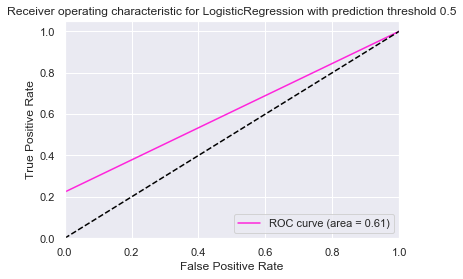

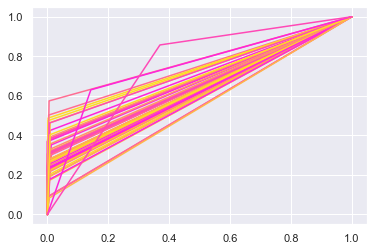

In [110]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(55):
    fpr[i], tpr[i], _ = roc_curve(y_test_mlb[:, i], y_predicted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_mlb.ravel(), y_predicted.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for LogisticRegression with prediction threshold 0.5')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(55):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})')

###### *** Adjusting the threshold of prediction 

In [111]:
y_pred_prob=clf.predict_proba(X_test_cv)

In [112]:
y_pred_new=(y_pred_prob>=0.30).astype(int)

In [113]:
print('Accuracy score:',accuracy_score(y_test_mlb, y_pred_new))
print('F1_score average=macro:',f1_score(y_test_mlb, y_pred_new, average="macro"))
print('F1_score average=micro:',f1_score(y_test_mlb, y_pred_new, average="micro"))
print('F1_score average=weighted:',f1_score(y_test_mlb, y_pred_new, average="weighted"))
print('Precision_score average=macro:',average_precision_score(y_test_mlb, y_pred_new, average="macro"))
print('Precision_score average=micro:',average_precision_score(y_test_mlb, y_pred_new, average="micro"))
print('Precision_score average=weighted:',average_precision_score(y_test_mlb, y_pred_new, average="weighted"))
print('Recall_score average=macro:',recall_score(y_test_mlb, y_pred_new, average="macro"))
print('Recall_score average=micro:',recall_score(y_test_mlb, y_pred_new, average="micro"))
print('Recall_score average=weighted:',recall_score(y_test_mlb, y_pred_new, average="weighted"))

Accuracy score: 0.27093333333333336
F1_score average=macro: 0.46015589307569776
F1_score average=micro: 0.5756439907488635
F1_score average=weighted: 0.543684877269331
Precision_score average=macro: 0.3042152879116026
Precision_score average=micro: 0.3823728618593155
Precision_score average=weighted: 0.40278302092961527
Recall_score average=macro: 0.3462902746053571
Recall_score average=micro: 0.4812
Recall_score average=weighted: 0.4812


##### Plotting ROC curve for prediction (with threshold 0.3) using LogisticRegression model

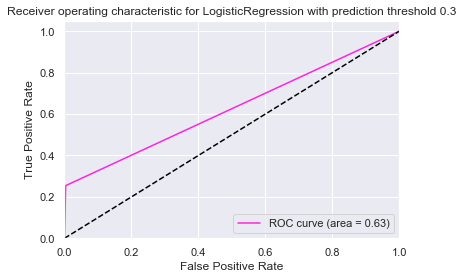

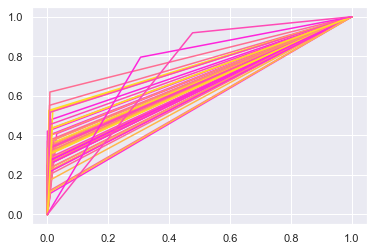

In [114]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(55):
    fpr[i], tpr[i], _ = roc_curve(y_test_mlb[:, i], y_pred_new[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_mlb.ravel(), y_pred_new.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for LogisticRegression with prediction threshold 0.3')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(55):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})')

##### Observation: Preformance of the model is slightly imporved when the prediction threshold is adjusted

### 10) Print true label and predicted label for any five examples (7.5 points)

In [115]:
y_pred_inversed=mlb.inverse_transform(y_pred_new)
y_test_inversed=mlb.inverse_transform(y_test_mlb)

In [116]:
for i in [1, 8, 7272, 2284, 3195, 563, 2948]:
    print('*** Text:\t{}\n*** True Labels:\t{}\n*** Predicted Labels:\t{}\n\n'.format(
        X_test[i],
        ','.join(y_test_inversed[i]),
        ','.join(y_pred_inversed[i])
    ))

*** Text:	cool idea hispanic woman black man channel gay community mtv launch new channel gay viewer may mtv launch gay network expert believe new network help advertiser target gay lesbian consumer may pm edt new york cnnmoney mtv networks tuesday launch new cable network carry program primarily aim gay lesbian viewer mtv own viacom inc viab research estimate new cable network call logo advertisersupporte schedule basic cable debut february content new network comprise percent originally develop show remainder outside source accord reuters plan launch gaythemed channel onagain offagain past year viacom early year wall street journal report sumner redstone viacom chairman ceo rare confession company mistake earlier scrap plan launch first us gaythemed network redstone order tom freston chairman chief executive viacom mtv network revive business plan industry watcher viacom renew interest amid surge popularity gay character gaytheme show television past year lead nbc grace last summer r